# Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1


In [7]:
number_data_test

200

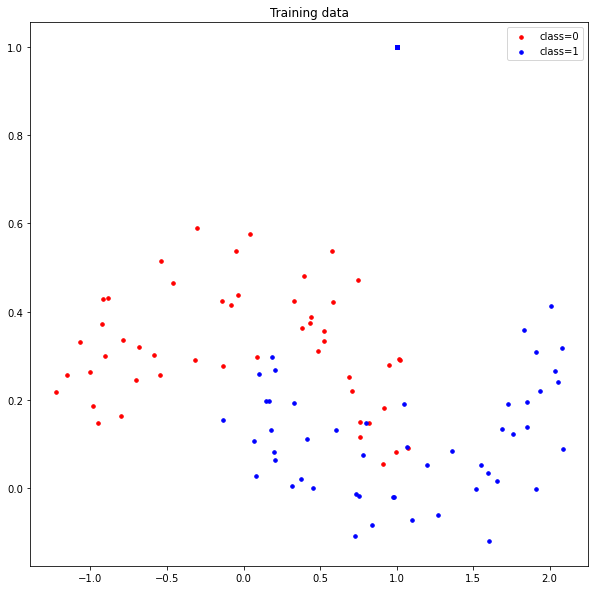

In [3]:
plt.figure(1,figsize=(10,10))
plt.scatter(  x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(  x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

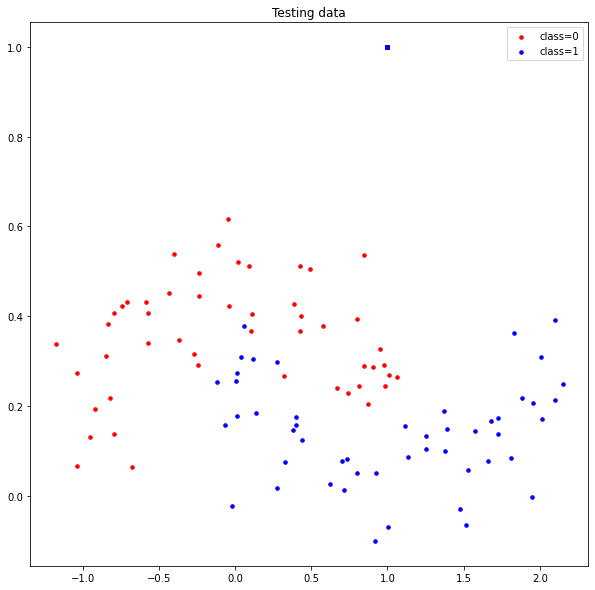

In [5]:
plt.figure(1,figsize=(10,10))
plt.scatter(  x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(  x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.title('Testing data')
plt.legend()
plt.show()

## equation

In [110]:
# sigmoid function
def sigmoid(z):
    sigmoid_f =1/(1+np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(np.dot(X,w))
    return p


# loss function definition
def loss_logreg(X,y,w,lambda_): 
    loss=np.mean(-y*np.log(f_pred(X,w)+1e-10)-(1-y)*np.log(1-f_pred(X,w)+1e-10))+lambda_*np.sum(w*w)/2
    return loss


# gradient function definition
def grad_loss(X,y,w,lambda_):
    n = len(y)
    grad =  np.dot(X.T,(f_pred(X,w)-y))/n*2+lambda_*w
    return grad


# gradient descent function definition
def grad_desc(X_train, X_test, y_train, y_test , w_init, tau, max_iter,lambda_):

    L_iters_train = np.zeros([max_iter])# record the loss values
    L_iters_test = np.zeros([max_iter])
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        grad_f = grad_loss(X_train,y_train,w,lambda_) # gradient of the loss
        w =  w - tau* grad_f # update rule of gradient descent  
        print(i)
        print()
        print(f_pred(X_train,w))
        L_iters_train[i] =  loss_logreg(X_train,y_train,w,lambda_)# save the current loss value 
        L_iters_test[i] =  loss_logreg(X_test,y_test,w,lambda_)# save the current loss value 

    return w, L_iters_train, L_iters_test

## define function

In [25]:
def makeArray(x1,x2):
    X = np.ones([number_data_test,100])

    for i in range(10):
        for j in range(10):
            X[:,i+j]=X[:,i+j]*np.power(x1,i)
            X[:,i*10+j]=X[:,i*10+j]*np.power(x2,j)
    return X
            


In [26]:
X_train=makeArray(x1_train,x2_train)
X_test=makeArray(x1_test,x2_test)

In [39]:
y_train = data_train[:,2].reshape(-1,1)
y_test = data_test[:,2].reshape(-1,1)

In [98]:
len(y_test)
lambda_=0.00001

In [100]:
w_init=np.ones([100,1])/10000
f_pred(X_train,w_init)
loss_logreg(X_train,y_train,w_init,lambda_)
np.mean(-y_train*np.log(f_pred(X_train,w_init)+1e-10)-(1-y_train)*np.log(1-f_pred(X_train,w_init)+1e-10))

0.6154177601279418

In [48]:
np.sum(w_init*w_init)

100.0

In [111]:
w_e5, L_iters_train_e5, L_iters_test_e5 = grad_desc(X_train, X_test, y_train, y_test , w_init, tau=0.01, max_iter=100, lambda_=0.00001)

0

[[5.10375525e-001]
 [6.25909483e-001]
 [8.30196657e-001]
 [9.99999740e-001]
 [5.11936845e-001]
 [5.10797090e-001]
 [5.11823262e-001]
 [5.14418781e-001]
 [5.10803860e-001]
 [5.26586211e-001]
 [5.12376056e-001]
 [7.67038286e-001]
 [5.16158710e-001]
 [5.17940084e-001]
 [5.13860205e-001]
 [5.20329391e-001]
 [5.17948295e-001]
 [5.13374578e-001]
 [5.14466965e-001]
 [5.14376224e-001]
 [5.15130313e-001]
 [5.14764445e-001]
 [5.21744784e-001]
 [5.16046985e-001]
 [5.12944136e-001]
 [5.12507613e-001]
 [5.15775040e-001]
 [5.16203953e-001]
 [5.15530560e-001]
 [5.19874896e-001]
 [5.22243468e-001]
 [5.16771232e-001]
 [5.12677263e-001]
 [5.18487741e-001]
 [5.12764994e-001]
 [5.11997042e-001]
 [5.11738754e-001]
 [5.13032297e-001]
 [5.10622232e-001]
 [5.14861207e-001]
 [5.09568627e-001]
 [5.13287964e-001]
 [5.11982188e-001]
 [2.53383068e-005]
 [4.94510578e-001]
 [4.77786410e-140]
 [4.52713342e-001]
 [5.10857680e-001]
 [3.59702007e-001]
 [0.00000000e+000]
 [1.00000000e+000]
 [1.00000000e+000]
 [1.00000

<ipython-input-110-44e3a6be5c45>:3: RuntimeWarning: overflow encountered in exp
  sigmoid_f =1/(1+np.exp(-z))




[[4.42749773e-01]
 [5.26164824e-01]
 [7.14905937e-01]
 [9.99973350e-01]
 [4.42736171e-01]
 [4.43919497e-01]
 [4.47119613e-01]
 [4.48002721e-01]
 [4.43978288e-01]
 [4.62137848e-01]
 [4.49087296e-01]
 [6.53701296e-01]
 [4.66138309e-01]
 [4.76453631e-01]
 [4.54820331e-01]
 [4.90215234e-01]
 [4.75508866e-01]
 [4.52641326e-01]
 [4.57264074e-01]
 [4.57164837e-01]
 [4.60552889e-01]
 [4.58776803e-01]
 [4.98155795e-01]
 [4.64951040e-01]
 [4.50142256e-01]
 [4.48104717e-01]
 [4.62675159e-01]
 [4.65090428e-01]
 [4.61541378e-01]
 [4.86186288e-01]
 [5.00855963e-01]
 [4.67285502e-01]
 [4.48395948e-01]
 [4.76844851e-01]
 [4.48160419e-01]
 [4.45567557e-01]
 [4.44413028e-01]
 [4.48933441e-01]
 [4.41459463e-01]
 [4.58932574e-01]
 [4.49043317e-01]
 [4.49676062e-01]
 [4.56325636e-01]
 [4.41547056e-04]
 [4.29732969e-01]
 [1.61110705e-99]
 [4.01305946e-01]
 [4.45387626e-01]
 [3.39425894e-01]
 [0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.0000

In [75]:
L_iters_train_e5

array([nan, nan, nan, ..., nan, nan, nan])

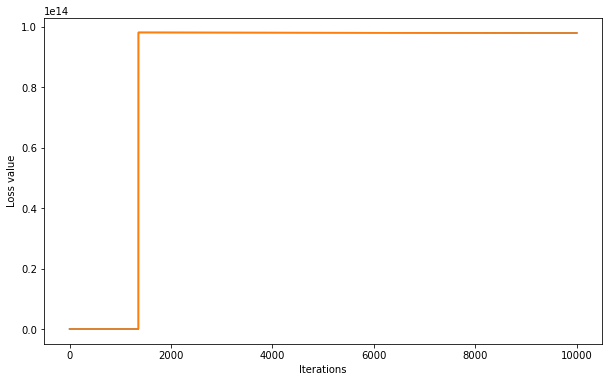

In [103]:
plt.figure(4, figsize=(10,6))
plt.plot(L_iters_test_e5)
plt.plot(L_iters_train_e5)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## Output using the dataset
<hr>

## 1. Plot the training data [0.5pt]

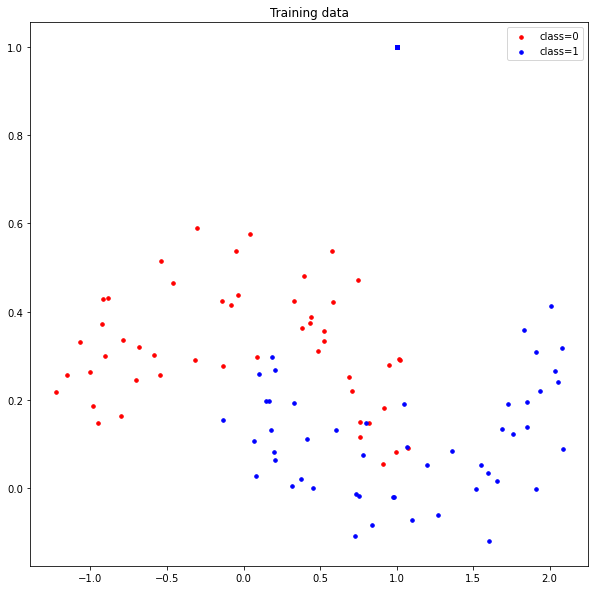

In [4]:
plt.figure(1,figsize=(10,10))
plt.scatter(  x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(  x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the testing data [0.5pt]

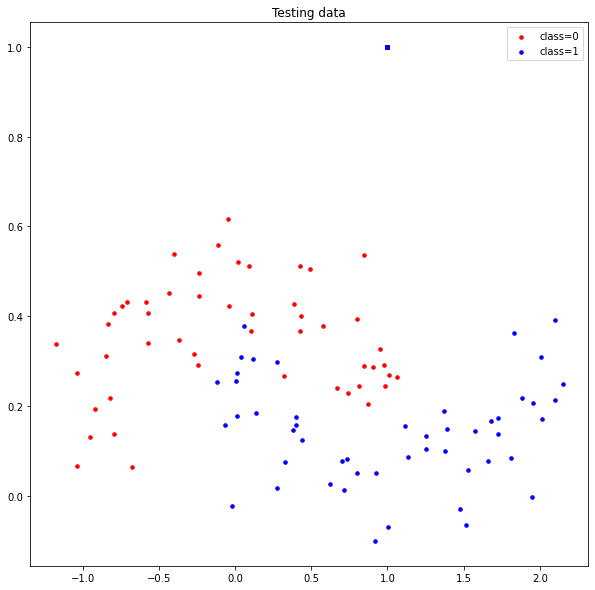

In [8]:
plt.figure(1,figsize=(10,10))
plt.scatter(  x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(  x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.title('Testing data')
plt.legend()
plt.show()

## 3. Plot the learning curve with λ=0.00001

## 4. Plot the learning curve with λ=0.0001 [1pt]<ht>

## 5. Plot the learning curve with λ=0.001 [1pt]

## 6. Plot the learning curve with λ=0.01 [1pt]

## 7. Plot the learning curve with λ=0.1 [1pt]

## 8. Plot the probability map of the obtained classifier with λ=0.00001[1pt]

## 9. Plot the probability map of the obtained classifier with λ=0.0001[1pt]

## 10. Plot the probability map of the obtained classifier with λ=0.001[1pt]

## 11. Plot the probability map of the obtained classifier with λ=0.01[1pt]

## 12. Plot the probability map of the obtained classifier with λ=0.1[1pt]

## 13. Print the final training accuracy with the given regularization parameters [2.5pt]

## 14. Print the final testing accuracy with the given regularization parameters [2.5pt]